# Chapter 1. The Machine Learning Landscape

## What is Machine Learning?

Machine Learning is the science of programming computers so they can learn from data.

A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E. -- Tom Mitchell, 1997.

Example: spam filter
Task T: to flag spam for new emails
Experience E: existing emails with labels (either spam or non-spam)
Performance measure P: ratio of correctly classified emails

Non-example: the collection of Wikipedia pages

## Why Use Machine Learning?

Traditional approach for spam filter:
1. Choose features of spam emails manually: "4U", "credit card", "free", "amazing"
2. Write an program to detect exactly the features you chose
3. Test the program and modify the features until satisfactory

Drawbacks: 
1. A large amount of features are needed - hard to maintain
2. Spammers may change their writing to avoid explicit rules: change "4U" to "For U".
3. For some complex problems, manually-engineered features are not good enough: hand-written digits

Machine Learning models:
1. Automatically learns which words and phrases are good predictors of spam. 
2. Since the program is not a stack of explicit rules, it is much shorter, easier to maintain, and most likely more accurate.
3. With new training data, the Machine Learning model can update automatically to capture new indicators of spam emails.

What Machine Learning is great for:
1. Problems for which existing solutions require a lot of hand-tuning or long lists of rules: one Machine Learning algorithm can often simplify code and perform better.
2. Complex problems for which there is no good solution at all using a traditional approach: the best Machine Learning techniques can find a solution.
3. Fluctuating environments: a Machine Learning system can adapt to new data.
4. Large amount of data: With Machine Learning, computers process big data faster than human.


## Various Types of Machine Learning
- Supervised vs. Unsupervised Learning
- Semisupervised, reinforcement, transfer, adverseral learning...
- Online learning
- Instance based vs. model based learning

## Challenges of Machine Learning
- Insufficient quantity of training data
- Non-representative training data
- Irrelevant features

## Two Machine Learning Guidelines
- No Free Lunch Theorem
- Curse of Dimensionality

## A Machine Learning Example: Does money make people happier?
Suppose you want to know if money makes people happy, so you download the Better Life Index data from the OECD's website:

http://stats.oecd.org/index.aspx?DataSetCode=BLI

as well as stats about GDP per capita from the IMF's website:

https://www.imf.org/external/datamapper/NGDPDPC@WEO/OEMDC/ADVEC/WEOWORLD

Download these files and save as BLI.csv and GDP.csv

We would like to model the correlation between BLI and GDP.

In [2]:
import os
current_path = os.getcwd()
os.listdir(current_path)

['.ipynb_checkpoints',
 '20190204_Chp1Ex.ipynb',
 'CMP 464 788 Week1 PythonTutorial.ipynb',
 'compare code week 2_ delete after.ipynb',
 'Data Sets',
 'datasets',
 'Lecture 1.ipynb',
 'Week3_Classification.ipynb']

In [3]:
datapath = current_path + '/Data Sets/'
# OR
datapath = os.path.join(current_path, 'Data Sets/')
os.listdir(datapath)

['IMF GDP.csv', 'OECD Better Life Index.csv']

In [4]:
import pandas as pd
pd.__version__

'0.23.4'

In [5]:
# use a data frame to store values from .csv
bli = pd.read_csv(datapath + 'OECD Better Life Index.csv')

In [6]:
# show the first few rows of bli
bli.head().T # or bli.head(10) to show 10 rows

,0,1,2,3,4
LOCATION,AUS,AUT,BEL,CAN,CZE
Country,Australia,Austria,Belgium,Canada,Czech Republic
INDICATOR,JE_LMIS,JE_LMIS,JE_LMIS,JE_LMIS,JE_LMIS
Indicator,Labour market insecurity,Labour market insecurity,Labour market insecurity,Labour market insecurity,Labour market insecurity
MEASURE,L,L,L,L,L
Measure,Value,Value,Value,Value,Value
INEQUALITY,TOT,TOT,TOT,TOT,TOT
Inequality,Total,Total,Total,Total,Total
Unit Code,PC,PC,PC,PC,PC
Unit,Percentage,Percentage,Percentage,Percentage,Percentage


In [7]:
# what are the columns
bli.columns

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

In [8]:
bli.dtypes # ['LOCATION'] for location for instance; or .dtypes to display all 

LOCATION                  object
Country                   object
INDICATOR                 object
Indicator                 object
MEASURE                   object
Measure                   object
INEQUALITY                object
Inequality                object
Unit Code                 object
Unit                      object
PowerCode Code             int64
PowerCode                 object
Reference Period Code    float64
Reference Period         float64
Value                    float64
Flag Codes                object
Flags                     object
dtype: object

In [9]:
bli['PowerCode Code'] = bli['PowerCode Code'].astype('int64')

In [10]:
bli['Indicator'].value_counts()

Employment rate                                      195
Voter turnout                                        195
Self-reported health                                 195
Personal earnings                                    195
Student skills                                       195
Long-term unemployment rate                          195
Household net adjusted disposable income             193
Life satisfaction                                    188
Quality of support network                           182
Time devoted to leisure and personal care            117
Employees working very long hours                    117
Water quality                                        117
Feeling safe walking alone at night                  117
Educational attainment                               117
Years in education                                   117
Homicide rate                                        117
Life expectancy                                      117
Rooms per person               

In [11]:
# extract life satisfaction part from the dataset
new_bli = bli[bli['Indicator'] == 'Life satisfaction']
new_bli['Indicator'].value_counts() 

Life satisfaction    188
Name: Indicator, dtype: int64

In [12]:
new_bli['INEQUALITY'].value_counts()

TOT    39
WMN    39
MN     39
HGH    37
LW     34
Name: INEQUALITY, dtype: int64

In [13]:
# from new_bli, extract the values associated with INEQUALITY in TOT[AL]
new_bli2 = new_bli[new_bli['INEQUALITY'] == 'TOT']
new_bli2['INEQUALITY'].value_counts()

TOT    39
Name: INEQUALITY, dtype: int64

In [14]:
new_bli2.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
2859,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.3,NaN,NaN
2860,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.0,NaN,NaN
2861,BEL,Belgium,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.9,NaN,NaN
2862,CAN,Canada,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.3,NaN,NaN
2863,CZE,Czech Republic,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.6,NaN,NaN


In [15]:
# create a data frame containing only 'Country' and 'Value'
final_bli = new_bli2[['Country', 'Value']]
final_bli.head()

,Country,Value
2859,Australia,7.3
2860,Austria,7.0
2861,Belgium,6.9
2862,Canada,7.3
2863,Czech Republic,6.6


In [16]:
final_bli = final_bli.set_index('Country')
final_bli.head()

,Value
Country,
Australia,7.3
Austria,7.0
Belgium,6.9
Canada,7.3
Czech Republic,6.6


In [17]:
final_bli = final_bli.rename(columns = {'Value' : 'BLI'})
final_bli.head()

,BLI
Country,
Australia,7.3
Austria,7.0
Belgium,6.9
Canada,7.3
Czech Republic,6.6


(array([ 1.,  3.,  2.,  1.,  7.,  2.,  4.,  5.,  4., 10.]),
 array([4.8 , 5.07, 5.34, 5.61, 5.88, 6.15, 6.42, 6.69, 6.96, 7.23, 7.5 ]),
 <a list of 10 Patch objects>)

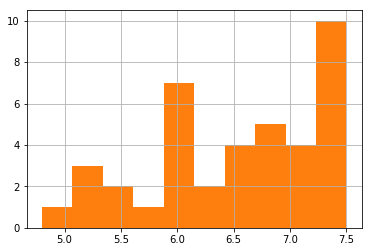

In [18]:
# use pandas to draw a historgram for the BLI
%matplotlib inline
final_bli['BLI'].hist()

import matplotlib.pyplot as plt
plt.hist(final_bli['BLI'])

## Pandas DataFrames

In [19]:
import numpy as np
data = np.array([['Alice', 24, 'A'],
                 ['Bob', 25, 'B'],
                 ['Claire', 24, 'C'],
                 ['Doug', 26, 'C']
                ])
print(data)

[['Alice' '24' 'A']
 ['Bob' '25' 'B']
 ['Claire' '24' 'C']
 ['Doug' '26' 'C']]


In [20]:
# load data as a pandas DataFrame
df = pd.DataFrame(data = data, 
                  columns = ['Name', 'Age', 'Grade'],
                  index = [10001, 10002, 10003, 10004]
                )

In [21]:
df.head()

,Name,Age,Grade
10001,Alice,24,A
10002,Bob,25,B
10003,Claire,24,C
10004,Doug,26,C


In [22]:
df2 = pd.DataFrame(df, copy = True)
df['Name'][10001] = 'Alice'
df2['Name'][10001]

'Alice'

columns:  Index(['Name', 'Age', 'Grade'], dtype='object')
data types:  Name     object
Age      object
Grade    object
dtype: object
frequencies of feature Name:  Alice     1
Claire    1
Bob       1
Doug      1
Name: Name, dtype: int64
average age:  24.75
variance of ages:  0.9166666666666666
shape of data frame:  (4, 3)


count     4.000000
mean     24.750000
std       0.957427
min      24.000000
25%      24.000000
50%      24.500000
75%      25.250000
max      26.000000
Name: Age, dtype: float64

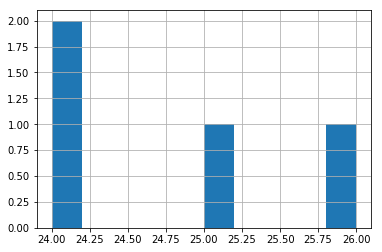

In [23]:
# things you can quickly get from a data frame
print('columns: ', df.columns)
print('data types: ', df.dtypes)
df['Age'] = df['Age'].astype('int64')
print('frequencies of feature Name: ', df['Name'].value_counts())
print('average age: ', df['Age'].mean())
print('variance of ages: ', df['Age'].var())
df['Age'].hist()
print('shape of data frame: ', df.shape)
df['Age'].describe()

In [24]:
df

,Name,Age,Grade
10001,Alice,24,A
10002,Bob,25,B
10003,Claire,24,C
10004,Doug,26,C


In [25]:
df[['Name']] # just show name

,Name
10001,Alice
10002,Bob
10003,Claire
10004,Doug


In [26]:
# extract the two rows in the middle
df.iloc[1:3, 0:2]

,Name,Age
10002,Bob,25
10003,Claire,24


In [27]:
df.loc[10001:10003, ['Age', 'Grade']]

,Age,Grade
10001,24,A
10002,25,B
10003,24,C


In [28]:
df.dtypes

Name     object
Age       int64
Grade    object
dtype: object

In [29]:
# create a new column who's value is the difference between age and the average age
df['Age'] = df['Age'].astype('int64')
df['Age Difference'] = df['Age'] - df['Age'].mean()
df

,Name,Age,Grade,Age Difference
10001,Alice,24,A,-0.75
10002,Bob,25,B,0.25
10003,Claire,24,C,-0.75
10004,Doug,26,C,1.25


In [30]:
# create a new column called passed to detect whether your grade is B or above
def is_passed(x):
    return x == 'A' or x == 'B'


df['Passed'] = df['Grade'].apply(is_passed)
df


,Name,Age,Grade,Age Difference,Passed
10001,Alice,24,A,-0.75,True
10002,Bob,25,B,0.25,True
10003,Claire,24,C,-0.75,False
10004,Doug,26,C,1.25,False


In [31]:
# will return opposite since we assume false
df['Failed'] = df['Passed'].apply(lambda x : not x)
df['Failed2'] = df['Grade'].apply(lambda x : not (x == 'A' or x == 'B')) # this is now the normal way to show this
df

,Name,Age,Grade,Age Difference,Passed,Failed,Failed2
10001,Alice,24,A,-0.75,True,False,False
10002,Bob,25,B,0.25,True,False,False
10003,Claire,24,C,-0.75,False,True,True
10004,Doug,26,C,1.25,False,True,True


In [32]:
# HW Load the 2018 GDP per capita data from GDP.csv as a DataFrame gdp
# Do some data exploration

In [33]:
os.getcwd()

'C:\\Users\\Muhammad\\Desktop\\Machine Learning\\Files'

In [34]:
print(datapath)
os.listdir(datapath)

C:\Users\Muhammad\Desktop\Machine Learning\Files\Data Sets/


['IMF GDP.csv', 'OECD Better Life Index.csv']

In [35]:
gdp = pd.read_csv(datapath + 'IMF GDP.csv', encoding='latin-1', sep = ',')

In [36]:
gdp.head()

,"GDP per capita, current prices (U.S. dollars per capita)",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,629.332,594.513,560.601,569.531,565.426,577.213,603.052,634.539,672.619,716.644
2,Albania,704.588,791.287,798.011,790.099,764.21,764.529,829.098,806.596,779.387,...,4584.914,3953.61,4132.208,4544.912,5260.901,5448.339,5860.246,6338.274,6873.993,7391.188
3,Algeria,2268.607,2305.505,2254.328,2316.679,2432.717,2753.697,2698.915,2705.111,2143.742,...,5466.329,4153.326,3928.385,4033.902,4449.792,4645.659,4738.474,4759.444,4826.249,4962.672
4,Angola,814.575,742.315,723.183,734.426,758.449,829.231,754.806,841.298,888.559,...,5625.736,4354.921,3676.826,4465.734,3924.347,3666.347,3702.478,3707.992,3757.571,3822.332


In [37]:
gdp.columns

Index(['GDP per capita, current prices\n (U.S. dollars per capita)', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [38]:
# change the second column's label to 'Country'
gdp.rename(columns={gdp.columns[0]: 'Country'}, inplace = True)
gdp.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,629.332,594.513,560.601,569.531,565.426,577.213,603.052,634.539,672.619,716.644
2,Albania,704.588,791.287,798.011,790.099,764.21,764.529,829.098,806.596,779.387,...,4584.914,3953.61,4132.208,4544.912,5260.901,5448.339,5860.246,6338.274,6873.993,7391.188
3,Algeria,2268.607,2305.505,2254.328,2316.679,2432.717,2753.697,2698.915,2705.111,2143.742,...,5466.329,4153.326,3928.385,4033.902,4449.792,4645.659,4738.474,4759.444,4826.249,4962.672
4,Angola,814.575,742.315,723.183,734.426,758.449,829.231,754.806,841.298,888.559,...,5625.736,4354.921,3676.826,4465.734,3924.347,3666.347,3702.478,3707.992,3757.571,3822.332


In [39]:
# keep only the country column and the 2018 column
gdp = gdp[['Country', '2018']]
gdp.head()

,Country,2018
0,NaN,NaN
1,Afghanistan,565.426
2,Albania,5260.901
3,Algeria,4449.792
4,Angola,3924.347


In [40]:
gdp.set_index('Country', inplace = True)
gdp.head()

,2018
Country,
NaN,NaN
Afghanistan,565.426
Albania,5260.901
Algeria,4449.792
Angola,3924.347


In [41]:
gdp.rename(columns={'2018': 'GDP'}, inplace = True)
gdp.head()

,GDP
Country,
NaN,NaN
Afghanistan,565.426
Albania,5260.901
Algeria,4449.792
Angola,3924.347


In [42]:
final_bli.head()

,BLI
Country,
Australia,7.3
Austria,7.0
Belgium,6.9
Canada,7.3
Czech Republic,6.6


In [43]:
data = pd.merge(gdp, final_bli, left_index = True, right_index = True)
data.head()

,GDP,BLI
Country,,
Australia,56698.098,7.3
Austria,51707.556,7.0
Belgium,46978.654,6.9
Brazil,9126.864,6.6
Canada,46733.032,7.3


##  Visualize the Correlation

In [44]:
data['GDP'] = data['GDP'].astype(np.float64)
data.dtypes

GDP    float64
BLI    float64
dtype: object

In [45]:
data.sort_values(by = 'GDP', inplace = True)
data.head(100)

,GDP,BLI
Country,,
South Africa,6560.041,4.8
Turkey,8715.513,5.5
Brazil,9126.864,6.6
Mexico,9614.276,6.6
Poland,14468.827,6.0
Hungary,16016.041,5.3
Chile,16143.419,6.7
Latvia,17634.365,5.9
Slovak Republic,19642.098,6.1


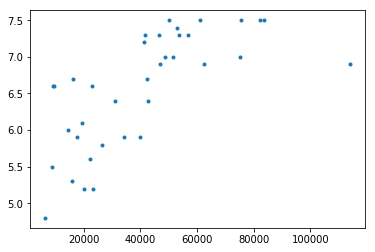

In [46]:
# Plot GDP vs BLI
plt.plot(data['GDP'], data['BLI'], '.')

## Use linear regression to characterize the trend

In [47]:
# Use linear regression from Sci-Kit Learn 
from sklearn.linear_model import LinearRegression
model = LinearRegression() # create a linear regression model
model.fit(data[['GDP']], data['BLI']) # fit model to data, needs to be a matrix 2D so double brackets

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
# Check the coefficients of the line
m = model.coef_[0]
b = model.intercept_
print('m, b:', m, b)

m, b: 2.188461474240074e-05 5.667977065418854


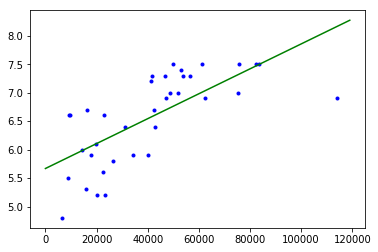

In [49]:
# Plot the regression line togetehr with data
plt.plot(data["GDP"], data['BLI'],  "b.")

# draw the line
xs = np.arange(0, 120000, 1000)
ys = m * xs + b
plt.plot(xs, ys, 'g-')

# plt.plot([100000], [10.0], 'r.') # add extra point

In [50]:
# Split the data into training set and test set
countries = ['Turkey', 'Germany']
data_train = data[data.index != 'Turkey']
data_train = data_train[data_train.index != 'Germany']
data_train.head(100)

,GDP,BLI
Country,,
South Africa,6560.041,4.8
Brazil,9126.864,6.6
Mexico,9614.276,6.6
Poland,14468.827,6.0
Hungary,16016.041,5.3
Chile,16143.419,6.7
Latvia,17634.365,5.9
Slovak Republic,19642.098,6.1
Greece,20311.014,5.2


In [69]:
# Train the linear regression model on data_train
model2 = LinearRegression()
model2.fit(data_train[['GDP']], data_train['BLI'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
data.loc['Turkey', 'BLI']

5.5

In [71]:
model2.predict(data.loc['Turkey', 'GDP'])

ValueError: Expected 2D array, got scalar array instead:
array=8715.513.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [54]:
data.loc['Germany', 'BLI']

7.0

In [55]:
model2.predict(data.loc['Germany', 'GDP'])

ValueError: Expected 2D array, got scalar array instead:
array=48669.628.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.